In [8]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
data = yf.download("TSLA", period="6mo")
data.head()


/tmp/ipython-input-9-2385059914.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", period="6mo")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-01-27,397.149994,406.690002,389.000000,394.799988,58125500
2025-01-28,398.089996,400.589996,386.500000,396.910004,48910700
2025-01-29,389.100006,398.589996,384.480011,395.209991,68033600
2025-01-30,400.279999,412.500000,384.410004,410.779999,98092900
2025-01-31,404.600006,419.989990,401.339996,401.529999,83283600


In [10]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data[['Close']]  # Make it 2D to avoid error


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Predict closing prices
y_pred = model.predict(X_test)

# Convert both actual and predicted to 1D lists
actual = y_test['Close'].values.flatten()
predicted = y_pred.flatten()

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted
})

comparison.head()


,Actual,Predicted
0,337.799988,339.615815
1,273.130005,288.426222
2,235.860001,238.288888
3,342.820007,340.760450
4,252.309998,249.032716


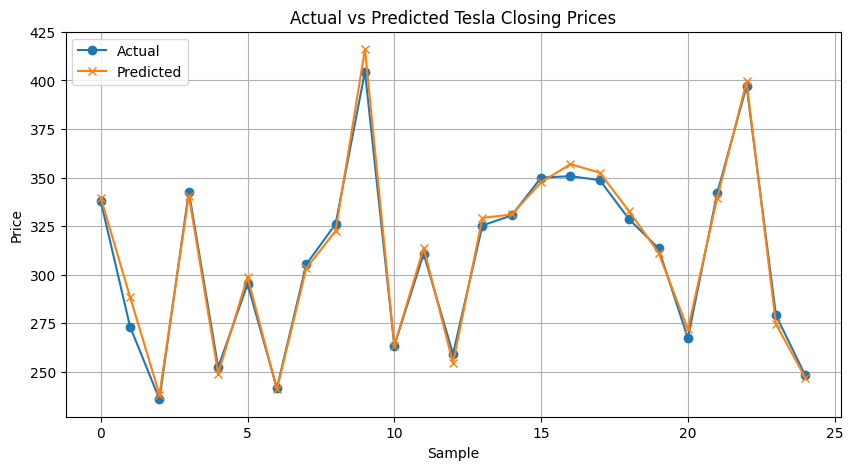

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual', marker='o')
plt.plot(predicted, label='Predicted', marker='x')
plt.title('Actual vs Predicted Tesla Closing Prices')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
mse = mean_squared_error(actual, predicted)
print("Mean Squared Error (MSE):", round(mse, 2))


Mean Squared Error (MSE): 24.16


✅ Task 2 Summary:
- Downloaded Tesla stock data from Yahoo Finance
- Used 4 features: Open, High, Low, Volume
- Built a Linear Regression model to predict Close price
- Compared actual vs predicted values
- Visualized results and calculated Mean Squared Error
